In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
##https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e 
##https://unipython.com/curso-de-procesamiento-de-textos-gensim/

In [79]:
df= pd.read_excel('./859181_INDICES_v_3_conductas.xlsx', header= 4)

In [77]:
##df.drop (columns=[0])
df ['Fecha']=pd.to_datetime(df['Fecha'])
df.head()
#df= df.drop(columns=[1])
#df= df.drop(columns=[10])

,Unnamed: 0,SP,Fecha,Resol. No.,Empresas,Mercado,Categoria,Conducta,Sancion,DETALLE,Unnamed: 10
0,NaN,326599,2002-10-17,46,"Beverage Associates Corp, Quilmes Industrialm ...",Mercado de la cerveza,bebidas,Carteles - Acuerdo de Precios - Archivo,Archivo,Realización de una operación de concentración ...,NaN
1,NaN,323089,1980-11-09,[127],The Buenos Aires Herald Ltda. / Sociedad de Di...,Distribución de diarios.,comunicacion,Distribución - Negativa -,Archivo,_,NaN
2,NaN,321373,1981-04-12,124,Acindar Industria Argentina de Aceros S.A. / S...,MANUFACTURING Fabricación de metales comunes -...,energia,Póliticas de precios - Guerra de precios - Con...,Archivo,Para que la guerra de precios pueda considerar...,NaN
3,NaN,321185,1981-08-09,257,Juan Ignacio Borchex y Oscar Dos Reis / Asocia...,Servicio funerario,funerario,Abuso de posición dominante,Archivo,Extensión de servicio mutual a personas no mut...,NaN
4,NaN,321190,1981-08-18,302,Tiboni y Cía S.R.L. / Sorensen y Cía. S.R.L.,Pantógrafos (calado o perforado de cristales p...,automotor,Trato exclusivo - patentes,Archivo,La denunciada ejerció una serie de presiones s...,NaN


In [50]:
df.shape
##la base de datos total de conductas es de 855 - 834= 21
#hay que ver cuales faltan. 

(834, 11)

# Normalizacion

In [61]:
#convertir todas las que son str lowercase
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

#eliminar los simbolos
df['Mercado'] = [re.sub("[\W+]",' ', str(x)) for x in df['Mercado']]
df['Conducta']= [re.sub("[\W+]",' ', str(x)) for x in df['Conducta']]

##convertir esto en una lista de palabras a eliminar.
filtrar = ['mercado', 'servicio', 'servicios', 'fabricación', 'fabricacion', 'fabricacion', 'manufacturing', 'mencionado', 'productos']
df['Mercado'] = df['Mercado'].apply(lambda x: ' '.join([word for word in x.split() if word not in (filtrar)]))

#eliminamos las stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
df['Mercado'] = df['Mercado'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df['Conducta'] = df['Conducta'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

##Tareas: en donde es nan el mercado, buscar completar. 

In [62]:
df.replace('', np.nan, inplace=True)

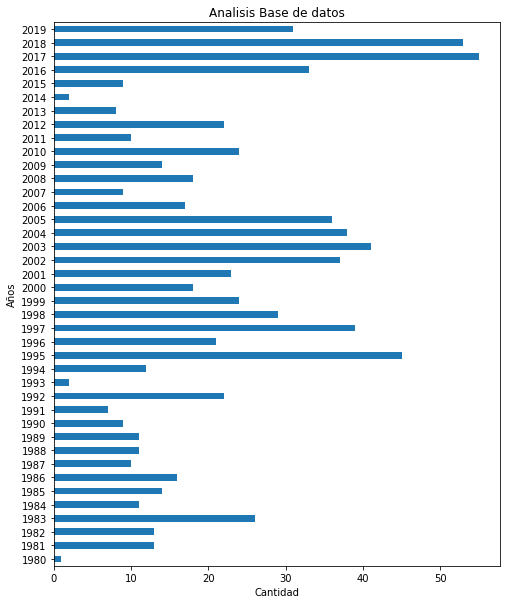

In [64]:
plt.figure(figsize=(8,10))
df.groupby(df.Fecha.dt.year).size().plot(kind='barh')
plt.ylabel('Años')
plt.xlabel('Cantidad')
plt.title('Analisis Base de datos')
plt.show()

In [8]:
###pip install --upgrade gensim

In [16]:
from gensim.models.keyedvectors import KeyedVectors
modelo = KeyedVectors.load_word2vec_format("./SBW-vectors-300-min5.bin.gz", binary=True)

##Documents/Medios/Python/Data Science/Bomchil/SBW-vectors-300-min5.bin.gz
###https://unipython.com/curso-de-procesamiento-de-textos-gensim/

In [17]:
modelo.most_similar(positive=["cerveza"],topn=3)
#solucionar los plurales. 

[('cervezas', 0.8439282774925232),
 ('bebida', 0.7717876434326172),
 ('bebidas', 0.7246816754341125)]

In [11]:
modelo.most_similar(positive=["distribucion","diarios"],topn=3)

[('mensuarios', 0.6806058883666992),
 ('OJDinteractiva', 0.6489880084991455),
 ('MMPCD', 0.6463779807090759)]

In [18]:
df_mercado=df['Mercado']
df_mercado = df_mercado.to_frame()
type (df_mercado)

##df_mercado= df_mercado.to_frame()
##df_mercado = df_mercado.astype(str)
#no reconoce los espacios en blanco.
#eliminar duplicados
df_mercado

,Mercado
0,cerveza
1,distribución diarios
2,metales comunes siderurgico
3,funerario
4,pantógrafos calado perforado cristales automóv...
...,...
829,actividades sanitarias sociales
830,nan
831,actividades sanitarias sociales dispensa medic...
832,información comunicación televisión cable


In [19]:
df_mercado['Mercado'].replace('', np.nan, inplace=True)
df_mercado['Mercado'].dropna (inplace= True)
df_mercado. head(8)

,Mercado
0,cerveza
1,distribución diarios
2,metales comunes siderurgico
3,funerario
4,pantógrafos calado perforado cristales automóv...
5,inmuebles
6,eléctricos
7,NaN


In [21]:
filtrar = ['NaN']
df_mercado['Mercado'] = df_mercado['Mercado'].apply(lambda x: ' '.join([word for word in x.split() if word not in (filtrar)]))

In [22]:
df_mercado. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Mercado  823 non-null    object
dtypes: object(1)
memory usage: 6.6+ KB


In [23]:
palabras= []

In [24]:
for word in df_mercado['Mercado']: 
    if word in modelo.vocab:
        ap= modelo.most_similar(word, topn=3)
        palabras.append (ap)
    else:
        palabras.append ('n/a')

In [25]:
procesado=pd.DataFrame(palabras) 
##procesado1 = pd.DataFrame(data=procesado['Number'].value_counts(), columns=[['Number','Count']]) 
procesado.shape

(834, 3)

In [26]:
procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       834 non-null    object
 1   1       834 non-null    object
 2   2       834 non-null    object
dtypes: object(3)
memory usage: 19.7+ KB


In [27]:
#eliminar los simbolos
procesado[0] = [re.sub("[\d+]",' ', str(x)) for x in procesado [0]]
procesado [0] = [re.sub("[\W+]",' ', str(x)) for x in procesado[0]]

procesado[1] = [re.sub("[\d+]",' ', str(x)) for x in procesado [1]]
procesado [1] = [re.sub("[\W+]",' ', str(x)) for x in procesado[1]]

procesado[2] = [re.sub("[\d+]",' ', str(x)) for x in procesado [2]]
procesado [2] = [re.sub("[\W+]",' ', str(x)) for x in procesado[2]]
procesado

,0,1,2
0,cervezas,bebida,bebidas
1,n,,a
2,n,,a
3,necrópolis,funerarios,tumbas
4,n,,a
...,...,...,...
829,n,,a
830,Hokkien,huà,jī
831,n,,a
832,n,,a


In [28]:
filtrar = ['n/a', 'Hokkien', 'huà', 'jī', 'n a', 'a', 'n']
procesado[0] = procesado[0].apply(lambda x: ' '.join([word for word in x.split() if word not in (filtrar)]))
procesado[1] = procesado[1].apply(lambda x: ' '.join([word for word in x.split() if word not in (filtrar)]))
procesado[2] = procesado[2].apply(lambda x: ' '.join([word for word in x.split() if word not in (filtrar)]))

In [29]:
procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       834 non-null    object
 1   1       834 non-null    object
 2   2       834 non-null    object
dtypes: object(3)
memory usage: 19.7+ KB


In [30]:
procesado.replace('', np.nan, inplace=True)
procesado.dropna (how= 'all', inplace= True)
procesado. head (8)
procesado. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 796
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       141 non-null    object
 1   1       141 non-null    object
 2   2       141 non-null    object
dtypes: object(3)
memory usage: 4.4+ KB


In [44]:
categorias =['cirujano', 'medicamento', 'television', 'bebidas', 'supermercado', 'automotor', 'alimentos', 
             'comunicacion', 'energia' 'construccion', 'seguro y finanza', 'inmueble', 'profesional', 'minorista', 'turismo', 'electrodomestico', 'transporte', 'agricultura']
mercado_1 = []

for word in df2.Mercado:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-44-21d3824c258c>, line 5)

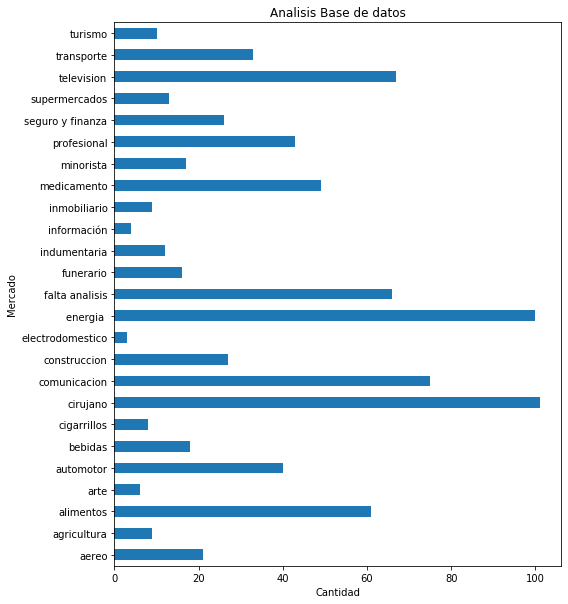

In [80]:
plt.figure(figsize=(8,10))
df.groupby(['Categoria']).size().plot(kind='barh')
plt.ylabel('Mercado')
plt.xlabel('Cantidad')
plt.title('Analisis Base de datos')
plt.show()

In [303]:
df_mercado['Mercado'] = df.apply(lambda row: nltk.word_tokenize (row['Mercado']), axis=1)

In [317]:
##from collections import Counter
##df_mercado['word_count'] = df_mercado['Mercado'].apply(lambda x: Counter(x.lower().split()))

In [ ]:
##https://datascience.stackexchange.com/questions/29160/counting-the-occurrence-of-each-string-in-a-pandas-dataframe-column 

In [ ]:
#familia de palabras relacionadas para compartir el corpus 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 1
clf = KNeighborsClassifier(n_neighbors =n_neighbors )

In [ ]:
clf.fit(X_train,y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [ ]:
#las conductas mas estudiadas. 
#las categorias mas sancionadas 